In [2]:
import glob
import ugradio
import numpy as np
import astropy
#import calibrate
import pyfits
from ugradio import nch
from astropy.io import fits
import ugradio.agilent
from ugradio import leo
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations

In [3]:
from scipy.interpolate import griddata

In [4]:
#gets fits data
b_data = [(pyfits.open(f)) for f in glob.glob('/home/gunnarwilliams/data/data_new*.fits')]

In [8]:
# create RA, DEC, and temp data arrays
ra_array = []
dec_array = []
l_array = []
b_array = []
data_array = [] #first polarization

for i in range(len(b_data)):
    ra_array.append(b_data[i][0].header['RA'])
    dec_array.append(b_data[i][0].header['DEC'])
    l_array.append(b_data[i][0].header['L'])
    b_array.append(b_data[i][0].header['B'])
    
    data_array.append(sum(b_data[i][1].data['auto0_real'])/len(b_data[i][1].data['auto0_real']))

In [7]:
#print dec_array

[72.24902546115959, 84.12795736213643, 85.5163926167556, 76.61449810293219, 67.84728621546866, 59.93465949144365, 75.75533611608093, 61.56276978232209, 72.06390310155153, 63.18545542504877, 69.49103600925928, 60.81820318582027, 59.60538018249783, 61.31335009239474, 83.2257891910595, 73.78822450890053, 75.7266923379007, 73.25753694723305, 66.81953478416605, 57.99442795956551, 81.95674663251383, 68.07726401493235, 59.67840497498388, 76.3541573523873, 75.73602198864816, 62.99722341246354, 82.64044870230762, 66.78449054285927, 66.09101510517245, 60.26723953624369, 76.35222571711402, 68.17199029710545, 69.1391587978188, 70.36093222709145, 69.6915693708503, 57.02727027383899, 67.25746653333259, 81.39383559405316, 76.25355286219192, 74.64089754538128, 71.92784657196185, 57.83415146236745, 75.82159832781076, 80.88250183326922, 69.1714801137779, 56.96571707173618, 68.40050735177066, 55.96068351283911, 79.99413402543904, 58.39494255839975, 82.44820315614503, 79.07698761766308, 67.0306030759261, 

In [9]:
#close data
for i in range(len(b_data)):
    b_data[i].close()

In [67]:
#convert ra and dec coords to cart
x_array = []
y_array = []
z_array = []



for i in range(-1,459):
    i += 1
    x_array.append((np.cos(dec_array[i]*(np.pi/180))*np.cos(ra_array[i]*(np.pi/180))))
    y_array.append((np.cos(dec_array[i]*(np.pi/180))*np.sin(ra_array[i]*(np.pi/180))))
    z_array.append((np.sin(dec_array[i]*(np.pi/180))))




In [70]:
coord = [[0] * 2 for i in range(460)]
for i in range(460):
    coord[i][0]=ra_array[i]
    coord[i][1]=dec_array[i]

In [73]:
#grid_z = griddata(coord, data_array, (grid_x, grid_y))

NameError: name 'grid_x' is not defined

In [88]:
colors = {}
for i in range(-1,459):
    i += 1
    colors.update({i:data_array[i]})

In [101]:
cm = plt.get_cmap("RdYlGn")


In [102]:
col = [cm(float(i)/(30)) for i in xrange(30)]


In [61]:
#create sphere


In [127]:
#for i in range(-1,459):
#    i += 1
#    ax.scatter(x_array[i],y_array[i],z_array[i],c=col,s=10)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')



fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_aspect("equal")




#make a sphere
u,v = np.mgrid[0:2*np.pi:20j,0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x,y,z, color = 'k')

p = ax.scatter(x_array,y_array,z_array,c=data_array,cmap='coolwarm',s=50)
cbar = fig.colorbar(p)
cbar.set_label('anisotropy')

In [128]:
#draw a vector
# draw a vector
'''from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

a = Arrow3D([0, 0], [0, 0], [0, 1], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")

b = Arrow3D([0, 0], [0, 1], [0, 0], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")

c = Arrow3D([0, 1], [0, 0], [0, 0], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="k")

ax.add_artist(a)
ax.add_artist(b)
ax.add_artist(c)
'''


'from matplotlib.patches import FancyArrowPatch\nfrom mpl_toolkits.mplot3d import proj3d\n\n\nclass Arrow3D(FancyArrowPatch):\n\n    def __init__(self, xs, ys, zs, *args, **kwargs):\n        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)\n        self._verts3d = xs, ys, zs\n\n    def draw(self, renderer):\n        xs3d, ys3d, zs3d = self._verts3d\n        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)\n        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))\n        FancyArrowPatch.draw(self, renderer)\n\na = Arrow3D([0, 0], [0, 0], [0, 1], mutation_scale=20,\n            lw=1, arrowstyle="-|>", color="k")\n\nb = Arrow3D([0, 0], [0, 1], [0, 0], mutation_scale=20,\n            lw=1, arrowstyle="-|>", color="k")\n\nc = Arrow3D([0, 1], [0, 0], [0, 0], mutation_scale=20,\n            lw=1, arrowstyle="-|>", color="k")\n\nax.add_artist(a)\nax.add_artist(b)\nax.add_artist(c)\n'

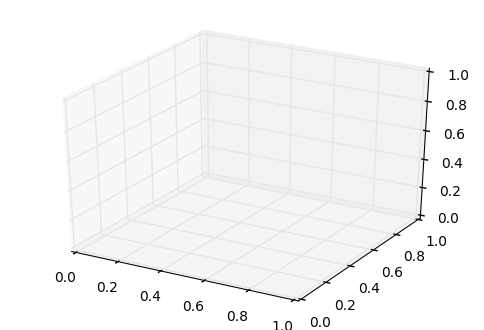

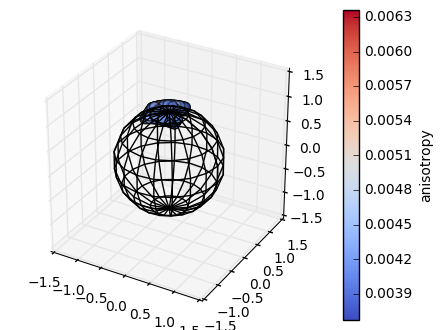

In [129]:
plt.show()